# Model evaluation
In this notebook, we will preprocess the data, sample, divide the dataset, and finally test the models to find the best one.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Remind
In previous notebook *(explore.ipynb)*, we have achieved something:
- Except for the transaction and amount we don't know what the other columns are (due to privacy reasons). The only thing we know, is that **those columns that are unknown have been scaled already**.
- The transaction **amount** is relatively **small**. The **mean** of all the mounts made is approximately **$88**.
- There are no **Null** values, so we don't have to work on ways to replace values.
- Most of the transactions were **Non-Fraud (99.83%)** of the time, while **Fraud** transactions occurs **(0.17%)** of the time in the dataframe.

## Scaling and distributing
We will first scale the columns comprise of Time and Amount. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub-sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
### Scaling

In [3]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [4]:
df.drop(["Amount", "Time"], axis=1, inplace=True)
df.insert(0, "scaled_time", scaled_time)
df.insert(1, "scaled_amount", scaled_amount)

In [5]:
df.describe()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.118914,0.927124,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.001727
std,0.557903,3.495006,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.994983,-0.307413,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.358210,-0.229162,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.641790,0.770838,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,1.035022,358.683155,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


### Spliting the dataset

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

org_trainX, org_testX, org_trainY, org_testY = train_test_split(X, y, test_size = 0.33, random_state=2608)

In [7]:
train_counts_label = np.unique(org_trainY, return_counts=True)[1]
test_counts_label = np.unique(org_testY, return_counts=True)[1]

print('Label Distributions: \n')
print("Training set: ", train_counts_label/len(org_trainY))
print("Test set: ", test_counts_label/len(org_testY))

Label Distributions: 

Training set:  [0.99828634 0.00171366]
Test set:  [0.99824444 0.00175556]


### Random Under-Sampling

In [8]:
df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=2608)

new_df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
143333,0.006967,-0.307413,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,...,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,1
204064,0.592147,4.513379,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,...,1.141615,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,1
137,-0.993997,-0.237686,-0.481376,1.003407,0.906184,-0.423864,0.760671,0.377627,0.587373,0.133884,...,0.082303,-0.277507,-0.752696,-0.145992,-1.353515,-0.095516,0.175811,0.144228,0.099683,0
151011,0.113629,-0.293440,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,...,1.657476,-3.474097,1.765446,1.701257,0.381587,-1.413417,-1.023078,-2.634761,-0.463931,1
218442,0.665280,2.426605,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,...,0.186898,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,-0.991494,-0.135401,1.145614,0.004148,0.772422,0.916543,-0.568699,-0.281603,-0.161752,-0.025480,...,-0.098173,-0.046280,0.174420,-0.014831,0.481153,0.460998,0.417277,0.007883,0.014894,0
50,-0.994572,-0.293579,1.199356,0.129953,0.863585,1.002635,-0.783761,-0.884679,-0.040743,-0.208069,...,-0.072620,-0.042468,0.198474,-0.033010,1.013290,0.559098,0.401818,-0.005865,0.017936,0
96994,-0.219164,-0.202194,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,0.768378,...,0.270360,0.352456,-0.243678,-0.194079,-0.172201,0.742237,0.127790,0.569731,0.291206,1
57615,-0.431279,-0.296793,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,...,0.207889,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,1


### Equally Distributing

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


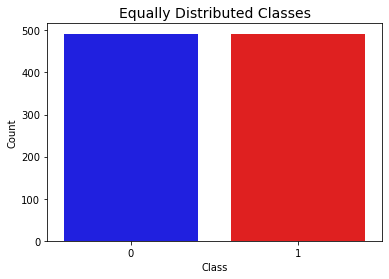

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette=['blue', 'red'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()